# Linear Classifiers

## Fitting a line to data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Supose we are measuring how a mouse weight (X) can be used to predict the mouse size(Y). The values are the following:

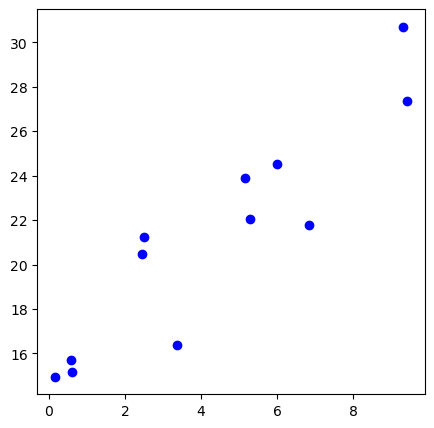

In [2]:
X = np.array([0.60316714, 5.13981077, 0.57754654, 3.35880456, 5.28171939,
        9.41578636, 2.43742198, 5.99075038, 2.49605785, 6.83781763,
        0.16296473, 9.29969598])
Y = np.array([15.15613261, 23.89223832, 15.72151754, 16.35859565, 22.06175073,
        27.36346235, 20.4802553 , 24.54353801, 21.22924112, 21.77229456,
        14.94636364, 30.70479942])
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(X, Y, color='blue', label='Random Points')
plt.show()

We train to find a good line that fit the data.

In [3]:
def draw_line(line, color, ax, values):
    min_value = np.min(values)
    max_value = np.max(values)
    # Generate x-values
    x = np.linspace(min_value, max_value, 100)  # range of x-values
    y = line(x)
    ax.plot(x, y, color=color)

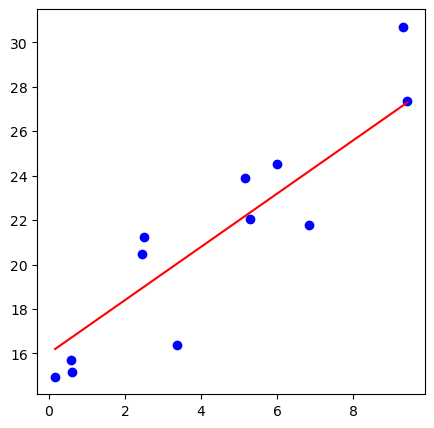

In [6]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(X, Y, color='blue', label='Random Points')
line = np.poly1d([1.2, 16])
draw_line(line, 'red', ax, X)
plt.show()

Now it comes the question, is it a good one? Is it the best posible line to fit the data?

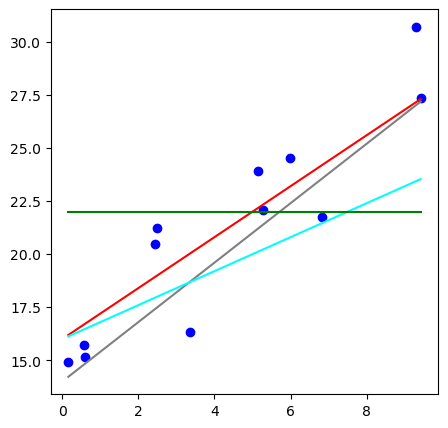

In [7]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(X, Y, color='blue', label='Random Points')
draw_line(np.poly1d([1.2, 16]), 'red', ax, X)
draw_line(np.poly1d([1.4, 14]), 'gray', ax, X)
draw_line(np.poly1d([0.8, 16]), 'cyan', ax, X)
draw_line(np.poly1d([0, 22]), 'green', ax, X)
plt.show()

We can measure now how well the line fits the data by seen how close is it to the data points

In [13]:
distances = []
for x, y in zip(X, Y):
    calculated_y = line(x)
    distance = abs(calculated_y - y)
    distances.append(distance)
print(distances)

[6.029716494166667, 2.706389215833333, 5.464331564166667, 4.827253454166666, 0.8759016258333325, 6.1776132458333315, 0.7055938041666678, 3.3576889058333315, 0.04339201583333363, 0.5864454558333314, 6.239485464166668, 9.518950315833333]


Or we can use a comprehension

In [15]:
distances = [abs(line(x) - y) for x, y in zip(X, Y)]
print(distances)

[6.029716494166667, 2.706389215833333, 5.464331564166667, 4.827253454166666, 0.8759016258333325, 6.1776132458333315, 0.7055938041666678, 3.3576889058333315, 0.04339201583333363, 0.5864454558333314, 6.239485464166668, 9.518950315833333]


Since we want to penalize larger divergences, we square the terms (additionally, the *abs* have some nasty mathematical properties).

In [20]:
distances = [(line(x) - y)**2 for x, y in zip(X, Y)]

if we add all the distances, the result is named **sum of squared residuals (SSR)**, because the **residuals** are the differences between the real and estimated values.

In [21]:
sum(distances)

277.4327605321405

Now lets create a function for performing the evaluation

In [22]:
def sum_sq_res(line, X, Y):
    return sum((line(x) - y)**2 for x, y in zip(X, Y))

sum_sq_res(line, X, Y)

277.4327605321405

Lets evaluate the functions we used before

red 49.232492444404805
gray 59.52279969129367
cyan 125.26264915852755
green 285.38686070637516


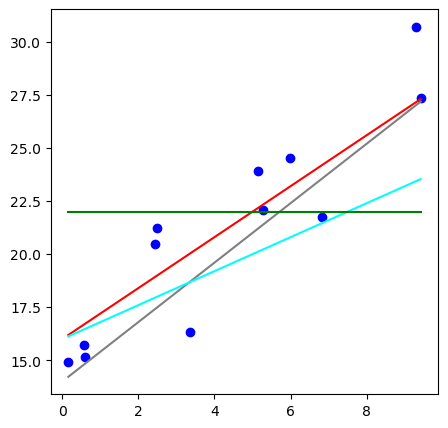

In [24]:
all_lines = [
    (np.poly1d([1.2, 16]), 'red'), 
    (np.poly1d([1.4, 14]), 'gray'),
    (np.poly1d([0.8, 16]), 'cyan'),
    (np.poly1d([0, 22]), 'green'),
]

fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(X, Y, color='blue', label='Random Points')
for l, color in all_lines:
    draw_line(l, color, ax, X)
    print(color, sum_sq_res(l, X, Y))
plt.show()

As you can see, the better the line fit the data, the smaller value it have on the SSR. 

Lets try to find the line with the minimal value. This method is called **Least Squares**. We need to find two values:
- The curve slope, that controls the angle with respect to the horizontal axis
- The curve intercept, that controls the point where the curve cuts the vertical axis.

Consider the horizontal line with the average value. This is not a good one, but since it is based on data, will be our starting point.



21.185849104166667


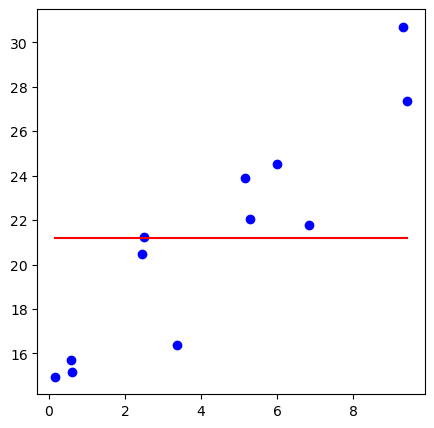

In [25]:
b = np.average(Y)
print(b)
line = np.poly1d([0, b])

fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(X, Y, color='blue', label='Random Points')
draw_line(line, 'red', ax, X)

Now we explore the influence of the slope in the SSR

In [29]:
for slope in np.arange(-4, 4, 0.1):
    line = np.poly1d([slope, b])
    ssr = sum_sq_res(line, X, Y)
    print(slope, ssr)

-4.0 6967.60601848117
-3.9 6669.203555827606
-3.8 6377.526638364034
-3.6999999999999997 6092.575266090453
-3.5999999999999996 5814.349439006862
-3.4999999999999996 5542.849157113265
-3.3999999999999995 5278.074420409659
-3.2999999999999994 5020.0252288960455
-3.1999999999999993 4768.701582572424
-3.099999999999999 4524.103481438793
-2.999999999999999 4286.230925495154
-2.899999999999999 4055.083914741507
-2.799999999999999 3830.662449177852
-2.699999999999999 3612.966528804189
-2.5999999999999988 3401.996153620516
-2.4999999999999987 3197.751323626836
-2.3999999999999986 3000.232038823147
-2.2999999999999985 2809.43829920945
-2.1999999999999984 2625.3701047857453
-2.0999999999999983 2448.0274555520323
-1.9999999999999982 2277.41035150831
-1.8999999999999981 2113.5187926545805
-1.799999999999998 1956.3527789908424
-1.699999999999998 1805.912310517096
-1.5999999999999979 1662.1973872333415
-1.4999999999999978 1525.2080091395783
-1.3999999999999977 1394.944176235807
-1.2999999999999976 12

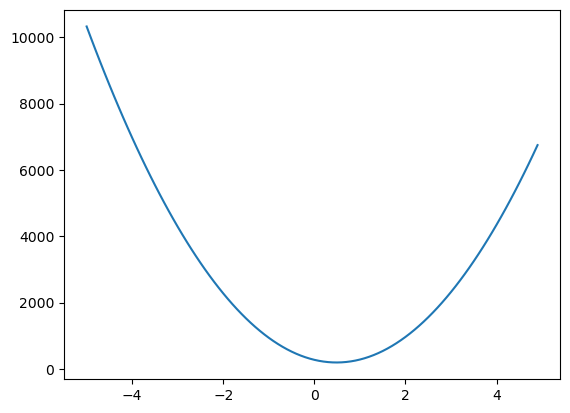

In [34]:
# using a comprehension
points = [(slope, sum_sq_res(np.poly1d([slope, b]), X, Y)) for slope in np.arange(-5, 5, 0.1)]
ssrs = np.array(points)
plt.plot(ssrs[:, 0],ssrs[:, 1])
plt.show()


The ssr function has a derivative that is easy to calculate, allowing us to directly locate the minimum by finding the point where the derivative equals zero.

For this example, since we have a computer, we can directly get the slope with lowest ssr value:

In [38]:
min_row_index = np.argmin(ssrs[:, 1])
min_slope = ssrs[min_row_index, 0]
min_slope

0.49999999999998046

21.185849104166667


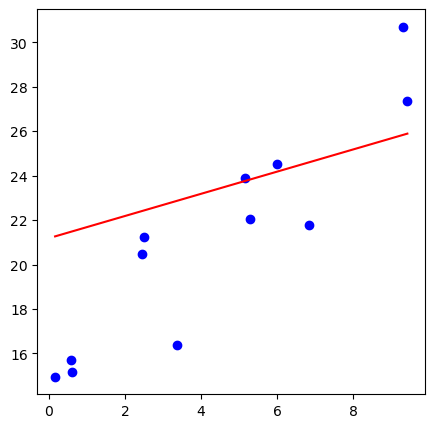

In [39]:
b = np.average(Y)
print(b)
line = np.poly1d([min_slope, b])

fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(X, Y, color='blue', label='Random Points')
draw_line(line, 'red', ax, X)

We can do a similar operation in both parameters simultaneously to find the best line.

In [58]:
points = [(slope, c, sum_sq_res(np.poly1d([slope, c]), X, Y)) 
          for slope in np.arange(-5, 5, 0.1) 
          for c in np.arange(10, 20, 0.1)]

In [59]:
points = np.array(points)
points

array([[-5.00000000e+00,  1.00000000e+01,  1.75950850e+04],
       [-5.00000000e+00,  1.01000000e+01,  1.75167575e+04],
       [-5.00000000e+00,  1.02000000e+01,  1.74386699e+04],
       ...,
       [ 4.90000000e+00,  1.97000000e+01,  6.02212813e+03],
       [ 4.90000000e+00,  1.98000000e+01,  6.06925160e+03],
       [ 4.90000000e+00,  1.99000000e+01,  6.11661508e+03]])

Lets plot the SSR values with respect to slope and c

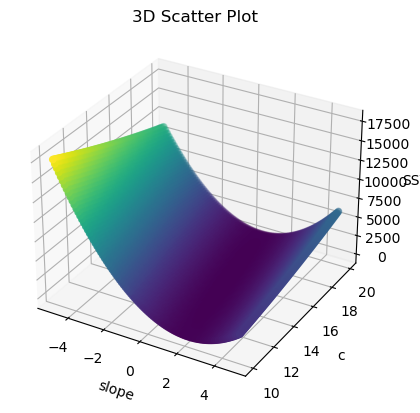

In [67]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the points in 3D
ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=points[:, 2])

# Set labels and title
ax.set_xlabel('slope')
ax.set_ylabel('c')
ax.set_zlabel('SSV')
ax.set_title('3D Scatter Plot')

# Show the plot
plt.show()


And get the lowest value

In [61]:
min_row_index = np.argmin(points[:,2])
min_slope, min_c, ssr = points[min_row_index]
min_slope, min_c, ssr

(1.3999999999999773, 15.199999999999982, 43.2315310128937)

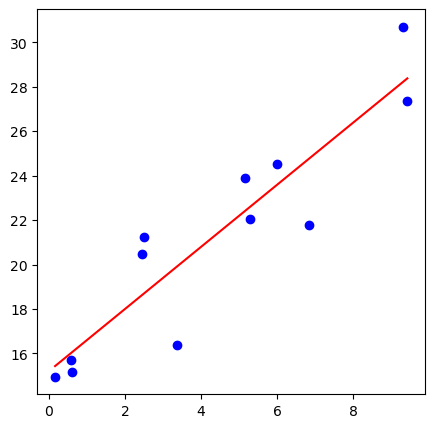

In [62]:
line = np.poly1d([min_slope, min_c])

fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(X, Y, color='blue', label='Random Points')
draw_line(line, 'red', ax, X)

Summarizing:
- To fit the model to the available data we need to minimize the sum of squared residual from the model and the data
- To do this, we calculate the derivative of the SSR with respect to the model parameters
- The point where the derivative is zero is the one that minimizes the SSR, so it must be used for the final model

## Evaluating the quality of fitting, the R^2

Lets start by taking only the mouse size, and plotting the line of its average value.

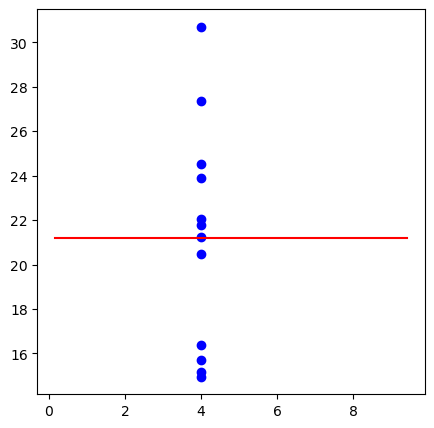

In [74]:
mean_size = np.mean(Y)

fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(np.full(len(Y), 4), Y, color='blue', label='Random Points')
draw_line(np.poly1d([0, mean_size]), 'red', ax, X)

Now, calculate the SSR around the mean

In [76]:
ssr_mean = sum((mean_size - y)**2 for y in Y)
ssr_mean

277.4327605321405

The variation around the mean is calculated dividing ssr_mean by the number of elements

In [78]:
Var_mean = ssr_mean / len(Y)
Var_mean

23.119396711011706

Now calculate the SSR for our best estimation of the line that relates mouse weight and size

In [79]:
line = np.poly1d([min_slope, min_c])
ssr_fit = sum((line(x) - y)**2 for x, y in zip(X, Y))
ssr_fit

43.2315310128937

And its variance

In [81]:
Var_fit = ssr_fit / len(Y)
Var_fit

3.602627584407808

We can see that a part of the variation of the the Y variable can be "explained" by taking the X variable into account.
- The variation in the mouse size can be explained partially by taking the mouse weight into cosideration.

R^2 tells us how much of the variation in the mouse size can be explained by taking the mouse weight into acount. The equation is the following:

R^2 = (Var_mean - Var_fit) / Var_mean.

Since the number of elements divide both variances, we can simplify by:

R^2 = (ssr_mean - ssr_fit) / ssr_mean

In [83]:
R_2 = (ssr_mean - ssr_fit) / ssr_mean
R_2

0.8441729414724786

This means that almost 85% of the variation in mouse size can be explained by taking weight into account using the calculated model. This is quite good indeed!!

Lets see another example

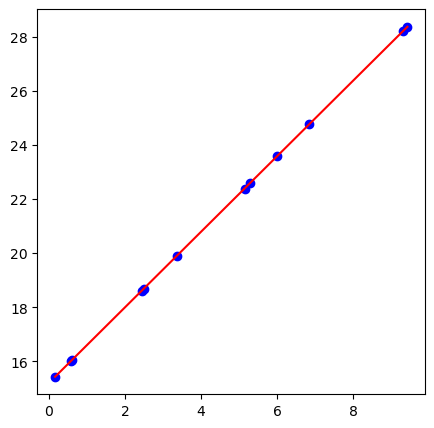

In [84]:
Y2 = line(X)

fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(X, Y2, color='blue', label='Random Points')
draw_line(line, 'red', ax, X)

In [85]:
ssr_mean = sum((mean_size - y)**2 for y in Y2)
ssr_fit = sum((line(x) - y)**2 for x, y in zip(X, Y2))
R_2 = (ssr_mean - ssr_fit) / ssr_mean
R_2

1.0

We can see that 100% of the variance in the Y variable can be explained by the X variable using the line equation. Perfect match!

Lets see a final example

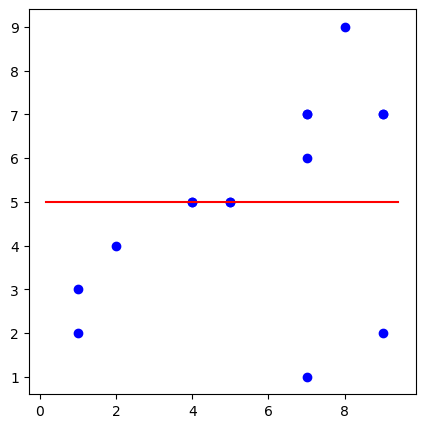

In [94]:
X3 = np.random.randint(1, 10, size=15)
Y3 = np.random.randint(1, 10, size=15)
line3 = np.poly1d([0, np.average(Y3)])

fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(X3, Y3, color='blue', label='Random Points')
draw_line(line3, 'red', ax, X)

Lets calculate R^2

In [100]:
mean_size = np.average(Y3)
ssr_mean = sum((mean_size - y)**2 for y in Y3)
ssr_fit = sum((line3(x) - y)**2 for x, y in zip(X3, Y3))
R_2 = (ssr_mean - ssr_fit) / ssr_mean
R_2

0.0

In this case, since R^2 is zero, knowing the mouse weight do not helps us to explain the mouse size, and the model we built is useless.

**Note**. We apply this analysis to lines, but it can be perfomed to any other model. 

## Linear classifiers in Scikit-learn

In [103]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

data = pd.read_csv('data/heart.csv')
label_encoder = LabelEncoder()
data["Sex"] = label_encoder.fit_transform(data["Sex"])
data["ChestPainType"] = label_encoder.fit_transform(data["ChestPainType"])
data["RestingECG"] = label_encoder.fit_transform(data["RestingECG"])
data["ExerciseAngina"] = label_encoder.fit_transform(data["ExerciseAngina"])
data["ST_Slope"] = label_encoder.fit_transform(data["ST_Slope"])
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


### Simple linear regression models
Lets try to predict the person Age, based on the other parameters

In [115]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

X = data.iloc[:, 1:]
y = data.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = LinearRegression()
regressor.fit(X_train, y_train)


# Print the coefficients
print("Coefficients:", regressor.coef_)
print("Intercept:", regressor.intercept_)


Coefficients: [-1.10320778e+00  8.57743462e-01  9.83753865e-02 -1.78929596e-03
  3.07630670e+00 -1.02034440e+00 -1.17507130e-01  1.47922574e-01
  1.54049461e+00 -3.00454067e-01  1.13239091e+00]
Intercept: 55.76255363625773


And evaluate it.

In [124]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

# Calculate predicted values
y_pred = regressor.predict(X)

# Calculate sum of squared errors (SSE)
sse = mean_squared_error(y, y_pred) * len(y)

# Calculate total sum of squares (SST)
sst = np.sum((y - np.mean(y))**2)

# Calculate R-squared value
r_squared = 1 - (sse / sst)

# Calculate p-values using statsmodels
X_t = sm.add_constant(X)  # Add constant column for intercept
model = sm.OLS(y, X_t)
results = model.fit()
p_values = results.pvalues

# Print results
print("Sum of Squared Errors (SSE):", sse)
print("R-squared:", r_squared)
print("P-values:")
for k, p in p_values.items():
    print(k, str(round(p, 2)))

Sum of Squared Errors (SSE): 60980.56582590441
R-squared: 0.2525919727060363
P-values:
const 0.0
Sex 0.09
ChestPainType 0.02
RestingBP 0.0
Cholesterol 0.47
FastingBS 0.0
RestingECG 0.01
MaxHR 0.0
ExerciseAngina 0.85
Oldpeak 0.0
ST_Slope 0.37
HeartDisease 0.1


### Logistic classifier
A logistic classifier, also known as logistic regression, is a popular classification algorithm used in machine learning. 
- It is primarily used for binary classification tasks, where the goal is to predict the probability of an input belonging to a particular class.
- The logistic classifier utilizes the logistic function, also called the sigmoid function, to model the relationship between the input features and the target class probabilities. 
- The sigmoid function maps any real-valued input to a value between 0 and 1, representing the probability of the input belonging to the positive class.

In this example, we have the probability of mouse to be obese based on its weight.

In [227]:
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

weights = [1,2, 2.5, 3, 4, 5, 4, 5, 6, 8, 9, 10]
obese_prob = [ 0,0,0,0,0, 0,0,1,1,1,1, 1]

X = np.array([[x] for x in weights])
y = np.array(obese_prob)

Now, lets train a Logistic regression model.

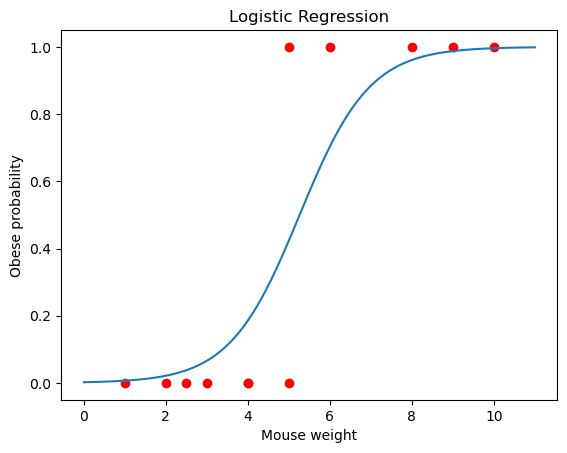

In [230]:
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt


# Initialize and train the logistic regression classifier
clf = LogisticRegression()
clf.fit(X, y)

# Plot the decision boundary
x_min, x_max = X.min() - 1, X.max() + 1
xx = np.linspace(x_min, x_max, 100).reshape(-1, 1)
y_pred = clf.predict_proba(xx)[:, 1]

plt.plot(xx, y_pred)
plt.scatter(X, y, c='red')
plt.ylabel('Obese probability')
plt.xlabel('Mouse weight')
plt.title('Logistic Regression')
plt.show()


- The learned model reveals that the probability of obesity tends to approach zero when the weight is closer to 2 or less. 
- Conversely, the probability of obesity tends to approach one when the weight is closer to 8. 
- It is important to note that the resulting probabilities range from 0 to 1, even though the training data only contains zeros and ones.

Now, lets try this model with real data:

In [231]:
data.head(3)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0


In [288]:
data_new = data.copy()
data_new['isOld'] = data.Age > 54
data_new = data_new.drop(['Age'], axis=1)

In [289]:
X = data_new.drop(['isOld'], axis=1)
y = data_new['isOld']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Now we evaluate the model

In [291]:
y_pred = clf.predict_proba(X_test)

This is, for the first 10 objects, the probability of classification in class 0 and 1, or 'young' and 'old'

In [294]:
np.hstack([y_pred, y_test.to_frame()])[:10, :]

array([[0.85531775, 0.14468225, 1.        ],
       [0.43287144, 0.56712856, 0.        ],
       [0.19417538, 0.80582462, 1.        ],
       [0.3373025 , 0.6626975 , 1.        ],
       [0.84997736, 0.15002264, 0.        ],
       [0.58391901, 0.41608099, 1.        ],
       [0.7112981 , 0.2887019 , 1.        ],
       [0.47504881, 0.52495119, 1.        ],
       [0.34317394, 0.65682606, 0.        ],
       [0.24068126, 0.75931874, 1.        ]])

Lets evaluate with accuracy, which assign the class to the highest probability

In [304]:
from sklearn.metrics import mean_squared_error

# Calculate predicted values
y_pred = clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.6231884057971014